<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-1/02_plotting_probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plotting probabilities

Data plots are among the most valuable tools in any data scientist’s arsenal. Without
good visualizations, we are effectively crippled in our ability to glean insights from
our data. Fortunately, we have at our disposal the external Python Matplotlib
library, which is fully optimized for outputting high-caliber plots and data visualizations.


In this notebook, we use Matplotlib to better comprehend the coin-flip probabilities.

##Setup

In [ ]:
!wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-science-bookcamp/case-study-1/probabilities.py

In [2]:
import matplotlib.pyplot as plt

from probabilities import *

##Plotting Basic

The `plt.plot` method takes as input two iterables:
x and y. Calling `plt.plot(x, y)` prepares a 2D plot of x versus y; displaying the plot
requires a subsequent call to `plt.show()`.

Let’s assign our x to equal integers 0
through 10 and our y values to equal double the values of x.

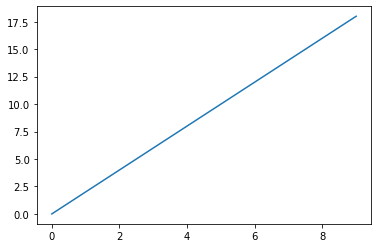

In [3]:
x = range(0, 10)
y = [2 * value for value in x]

plt.plot(x, y)
plt.show()

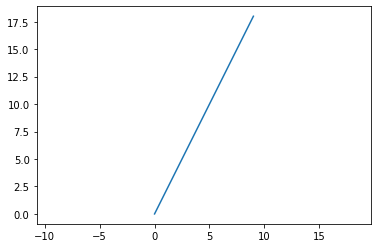

In [4]:
# We can equalize both axes by calling plt.axis('equal')
plt.plot(x, y)
plt.axis("equal")
plt.show()

However, this will lead to an awkward
visualization containing too much empty space.

If we prefer to visualize the 10 points individually, we can
do so using the `plt.scatter` method.

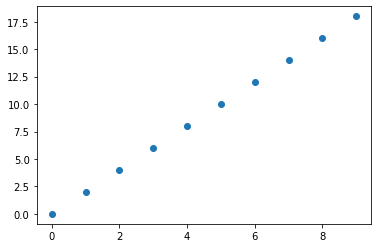

In [5]:
plt.scatter(x, y)
plt.show()

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this
by shading the area under the plotted curve over the specified interval, using the
`plt.fill_between` method.

The method takes as input both x and y and also a where
parameter, which defines the interval coverage. The input of the where parameter is a list
of Boolean values in which an element is True if the x value at the corresponding index
falls within the interval we specified.

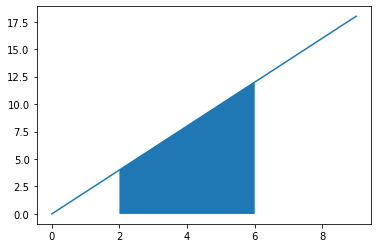

In [6]:
plt.plot(x, y)
where_condition = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where_condition)
plt.show()

Let’s execute all three methods in a single plot.

Doing so highlights an interval beneath a continuous line while also exposing individual coordinates.

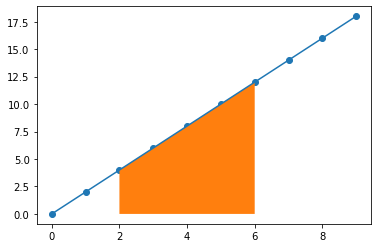

In [7]:
plt.plot(x, y)
plt.scatter(x, y)
plt.fill_between(x, y, where=where_condition)
plt.show()

No data plot is ever truly complete without descriptive x-axis and y-axis labels. Such
labels can be set using the `plt.xlabel` and `plt.ylabel` methods.

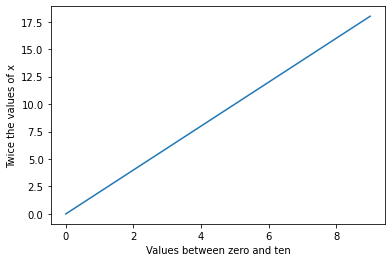

In [8]:
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")
plt.show()

##Plotting coin-flip probabilities

We examined the probability of seeing 80% or more
heads across a series of coin flips. That probability decreased as the coin-flip count
went up, and we wanted to know why.

Our aim is to compare the plotted data from both these dictionaries. We begin by
plotting the elements of `weighted_sample_space`: we plot its keys on the x-axis versus
the associated values on the y-axis.

In [9]:
weighted_sample_space = generate_coin_sample_space()

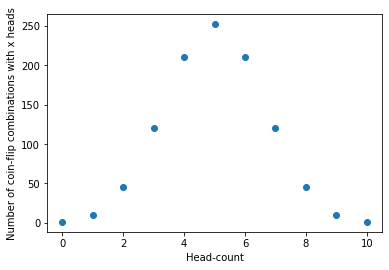

In [10]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Number of coin-flip combinations with x heads")
plt.show()

The visualized sample space takes on a symmetric shape. The symmetry is set around a
peak head count of 5. Therefore, head-count combinations closer to 5 occur more frequently
than those that are further from 5.

As we know, such frequencies correspond to probabilities. Thus, a head count is more probable if its value is closer to 5.

Let’s emphasize this by plotting the probabilities directly on the
y-axis.The probability plot will allow us to replace our lengthy y-axis label
with a more concisely stated 'Probability'.

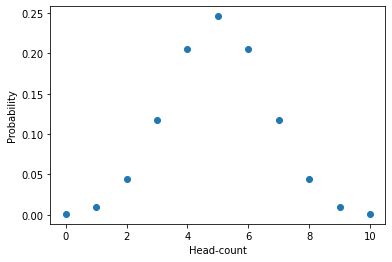

In [11]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]

plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Thus, just
by glancing at the plot, we can determine that the probability of observing five heads
is approximately 0.25. This mapping between x-values and probabilities is referred to
as a probability distribution. 

Probability distributions exhibit certain mathematically consistent
properties that make them useful for likelihood analysis.

For instance, consider
the x-values of any probability distribution: they correspond to all the possible values
of a random variable r. The probability that r falls within some interval is equal to the area beneath the probability curve over the span of that interval. 

Therefore, the total
area beneath a probability distribution always equals 1.0. This holds for any distribution,
including our head-count plot.



In [12]:
assert sum(prob_x_10_flips) == 1.0

The area beneath the head-count interval of 8 through 10 is equal to the probability
of observing eight heads or more.

Let’s visualize that area using the `plt.fill_between` method.

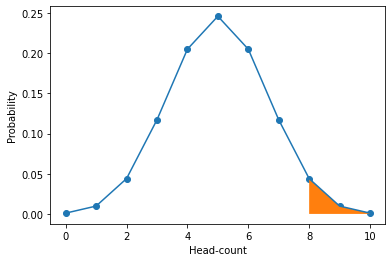

In [13]:
where_condition = [is_in_interval(value, 8, 10) for value in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_condition)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Now, let’s also shade the interval demarcating the probability of observing eight tails
or more.

Let's highlights the extremes along both tail ends of our probability
distribution.

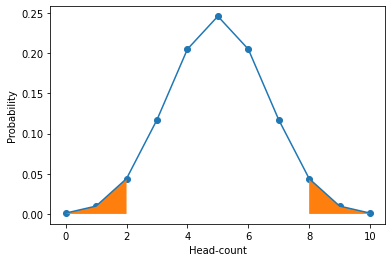

In [14]:
where_condition = [not is_in_interval(value, 3, 7) for value in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_condition)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

The two symmetrically shaded intervals cover the right and left tail ends of the coinflip
curve. Based on our previous analysis, we know that the probability of observing
more than seven heads or tails is approximately 10%. 

Therefore, each of the symmetrically
shaded tail segments should cover approximately 5% of the total area under
the curve.

##Comparing multiple coin-flip probability distributions

Let’s extend our plot to also encompass the distribution
for 20 flipped coins.

In [15]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)

In [16]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]

sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

Now we are ready to visualize the two distributions simultaneously.We
do this by executing `plt.plot` and `plt.scatter` on both probability distributions.

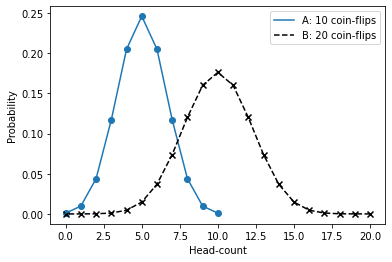

In [17]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
plt.scatter(x_10_flips, prob_x_10_flips)

plt.plot(x_20_flips, prob_x_20_flips, label="B: 20 coin-flips", color="black", linestyle="--")
plt.scatter(x_20_flips, prob_x_20_flips, color="k", marker="x")

plt.xlabel("Head-count")
plt.ylabel("Probability")
# legend is used to pass a label parameter into each plot
plt.legend()
plt.show()

Next, we highlight our interval of interest
(80% heads or tails) across each of the two curves.

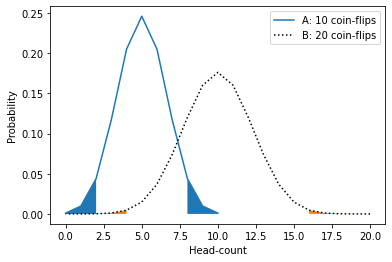

In [18]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(x_20_flips, prob_x_20_flips, label="B: 20 coin-flips", color="k", linestyle=":")

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel("Head-count")
plt.ylabel("Probability")
# legend is used to pass a label parameter into each plot
plt.legend()
plt.show()

The shaded area beneath the tail ends of distribution B is much lower than the
shaded interval beneath distribution A. This is because distribution A has fatter, more
elevated tail ends that cover a thicker area quantity. Thickness in the tails accounts for
differences in interval probabilities.

The visualization is informative, but only if we highlight the interval areas beneath
both curves.

Now come back to our main question.

why does the probability of observing 80% or more heads decrease
as the fair coin is flipped more times?

The answer is hard to extrapolate because the
two distributions show little overlap, making it difficult to do a direct visual comparison.
Perhaps we can improve the plot by aligning the distribution peaks. 

Distribution A is centered at 5 head counts (out of 10 coin flips), and distribution B is centered at
10 head counts (out of 20 coin flips).

If we convert the head counts into frequencies
(by dividing by the total coin flips), then both distribution peaks should align at a frequency
of 0.5. 

The conversion should also align our head-count intervals of 8-to-10
and 16-to-20 so that they both lie on the interval 0.8-to-1.0.

Let's improve the visualization by aligning the distribution peaks. If we convert the head-counts into frequencies (by
dividing by the total coin flips), then both the distribution peaks should align at a frequency of 0.5.


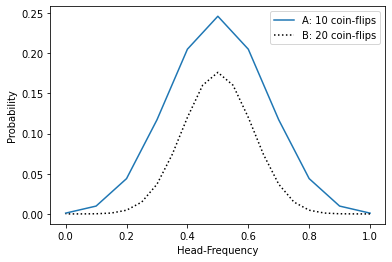

In [19]:
x_10_frequencies = [h_count / 10 for h_count in x_10_flips]
x_20_frequencies = [h_count / 20 for h_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(x_20_frequencies, prob_x_20_flips, label="B: 20 coin-flips", color="k", linestyle=":")
plt.xlabel("Head-Frequency")
plt.ylabel("Probability")
plt.legend()
plt.show()

As expected, the two peaks now both align at the head frequency of 0.5. 

However, our
division by the head counts has reduced the areas beneath the two curves by tenfold and twentyfold, respectively. The total area beneath each curve no longer equals 1.0.

This is a problem: as we’ve discussed, the total area under a curve must sum to 1.0 if we wish to infer an interval probability.

However, we can fix the area sums if we multiply the y-axis values of curves A and B by 10 and 20. The adjusted y-values will no longer
refer to probabilities, so we’ll have to name them something else. 

The appropriate
term to use is relative likelihood, which mathematically refers to a y-axis value within a
curve whose total area is 1.0.

In [20]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

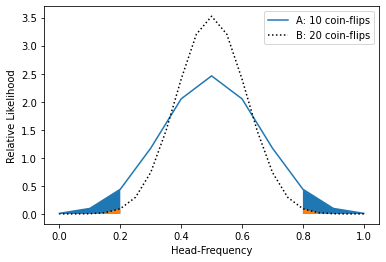

In [21]:
plt.plot(x_10_frequencies, relative_likelihood_10, label="A: 10 coin-flips")
plt.plot(x_20_frequencies, relative_likelihood_20, label="B: 20 coin-flips", color="k", linestyle=":")

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.xlabel("Head-Frequency")
plt.ylabel("Relative Likelihood")
plt.legend()
plt.show()

Since curve A is wider,
its area over more extreme head-frequency intervals is larger. Hence, observed recordings
of such frequencies are more likely to occur when the coin-flip count is 10 and not 20. 

Meanwhile, the thinner, more vertical curve B covers more area around the
central frequency of 0.5.

If we flip more than 20 coins, how will this influence our frequency distribution?

According to probability theory, each additional coin flip will cause the frequency curve to grow even taller and thinner.The curve will transform like a stretched rubber band that’s being pulled vertically upward: it will lose thickness in exchange for vertical length.

**As the total number of coin flips extends into the millions
and billions, the curve will completely lose its girth, becoming a single very long vertical peak whose center lies at a frequency of 0.5.**

Beyond that frequency, the nonexistent
area beneath the vertical line will approach zero. It follows that the area
beneath the peak will approach 1.0 because our total area must always equal 1.0. The
area of 1.0 corresponds to a probability of 1.0.

**Thus, as the number of coin flips approaches infinity, the frequency of heads will come to equal the actual probability of heads with absolute certainty.**

Let's try to proof it.

In [ ]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
prob_x_20_flips = [value / sum(weighted_sample_space_20_flips.values()) for value in y_20_flips]

weighted_sample_space_200_flips = generate_coin_sample_space(num_flips=200)
x_200_flips = list(weighted_sample_space_200_flips.keys())
y_200_flips = [weighted_sample_space_200_flips[key] for key in x_200_flips]
prob_x_200_flips = [value / sum(weighted_sample_space_200_flips.values()) for value in y_200_flips]

weighted_sample_space_2000_flips = generate_coin_sample_space(num_flips=2000)
x_2000_flips = list(weighted_sample_space_2000_flips.keys())
y_2000_flips = [weighted_sample_space_2000_flips[key] for key in x_2000_flips]
prob_x_2000_flips = [value / sum(weighted_sample_space_2000_flips.values()) for value in y_2000_flips]

In [ ]:
x_20_frequencies = [h_count / 20 for h_count in x_20_flips]
x_200_frequencies = [h_count / 200 for h_count in x_200_flips]
x_2000_frequencies = [h_count / 2000 for h_count in x_2000_flips]

relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]
relative_likelihood_200 = [200 * prob for prob in prob_x_200_flips]
relative_likelihood_2000 = [2000 * prob for prob in prob_x_2000_flips]

In [ ]:
plt.plot(x_20_frequencies, relative_likelihood_20, label="A: 20 coin-flips", color="b")
plt.plot(x_200_frequencies, relative_likelihood_200, label="B: 200 coin-flips", color="g", linestyle="--")
plt.plot(x_2000_frequencies, relative_likelihood_2000, label="B: 2000 coin-flips", color="k", linestyle=":")

#plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
#plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.xlabel("Head-Frequency")
plt.ylabel("Relative Likelihood")
plt.legend()
plt.show()

The relationship between infinite coin flips and absolute certainty is guaranteed by a
fundamental theorem in probability theory: **the law of large numbers**.

According to that law, the frequency of an observation becomes virtually indistinguishable from the
probability of that observation when the number of observations grows high. 

Therefore,
with enough coin flips, our frequency of heads will equal the actual probability
of heads, which is 0.5.

Now, let's generalize this concept in code.

In [ ]:
def compute_frequency_and_relative_likelihood(num_counts=10):
  # generate the sample space
  weighted_sample_space_flips = generate_coin_sample_space(num_flips=num_counts)

  # get the flips counts
  x_flips = list(weighted_sample_space_flips.keys())
  y_flips = [weighted_sample_space_flips[key] for key in x_flips]

  # get probability of flip counts
  prob_x_flips = [value / sum(weighted_sample_space_flips.values()) for value in y_flips]

  # get frequencies of flips counts
  x_frequencies = [h_count / num_counts for h_count in x_flips]

  # get relative likelihood of probability of flip counts
  relative_likelihood = [num_counts * prob for prob in prob_x_flips]

  return x_frequencies, relative_likelihood

In [ ]:
x_20_frequencies, relative_likelihood_20 = compute_frequency_and_relative_likelihood(num_counts=20)

In [ ]:
x_200_frequencies, relative_likelihood_200 = compute_frequency_and_relative_likelihood(num_counts=200)

In [ ]:
x_400_frequencies, relative_likelihood_400 = compute_frequency_and_relative_likelihood(num_counts=400)

In [ ]:
plt.plot(x_20_frequencies, relative_likelihood_20, label="A: 20 coin-flips", color="b")
plt.plot(x_200_frequencies, relative_likelihood_200, label="B: 200 coin-flips", color="g", linestyle="--")
plt.plot(x_400_frequencies, relative_likelihood_400, label="B: 400 coin-flips", color="k", linestyle=":")

#plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
#plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.xlabel("Head-Frequency")
plt.ylabel("Relative Likelihood")
plt.legend()
plt.show()